In [1]:
# https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('./wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df_std = df.std()
df_mean = df.mean()
df_std = (df - df_mean)/df_std

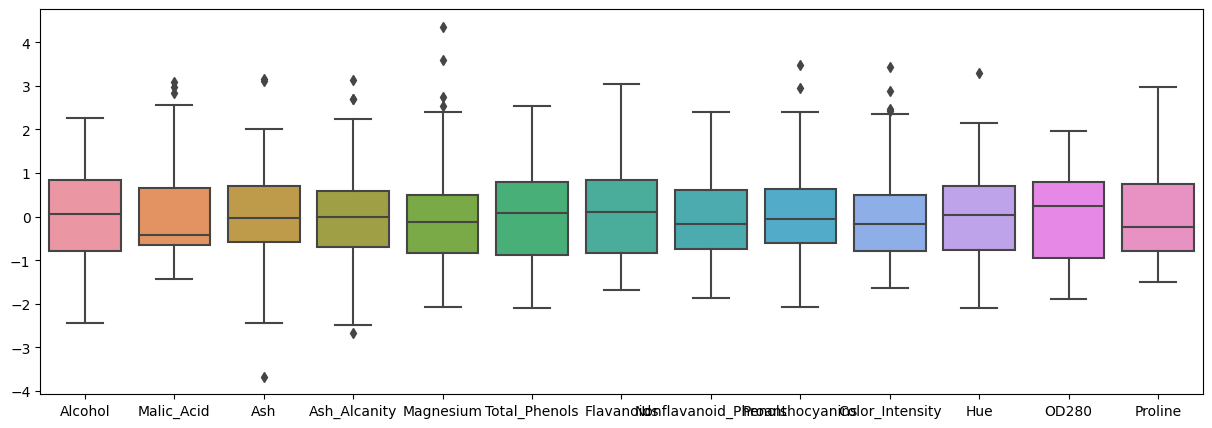

In [6]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_std)
plt.show()

In [7]:
df.shape

(178, 13)

In [8]:
for column in ('Ash', 'Malic_Acid', 'Ash_Alcanity', 'Magnesium', 'Hue','Color_Intensity','Proanthocyanins'):
    Q1 = np.percentile(df_std[column], 25,
                    method= 'midpoint')
    
    Q3 = np.percentile(df_std[column], 75,
                    method= 'midpoint')
    IQR = Q3 - Q1
    upper = np.where(df_std[column] >= (Q3+1.5*IQR))
    lower = np.where(df_std[column] <= (Q1-1.5*IQR))
    df_std.drop( upper[0], inplace = True)
    df_std.drop( lower[0], inplace = True)
    df.drop( upper[0], inplace = True)
    df.drop( lower[0], inplace = True)

In [9]:
df_std.shape

(161, 13)

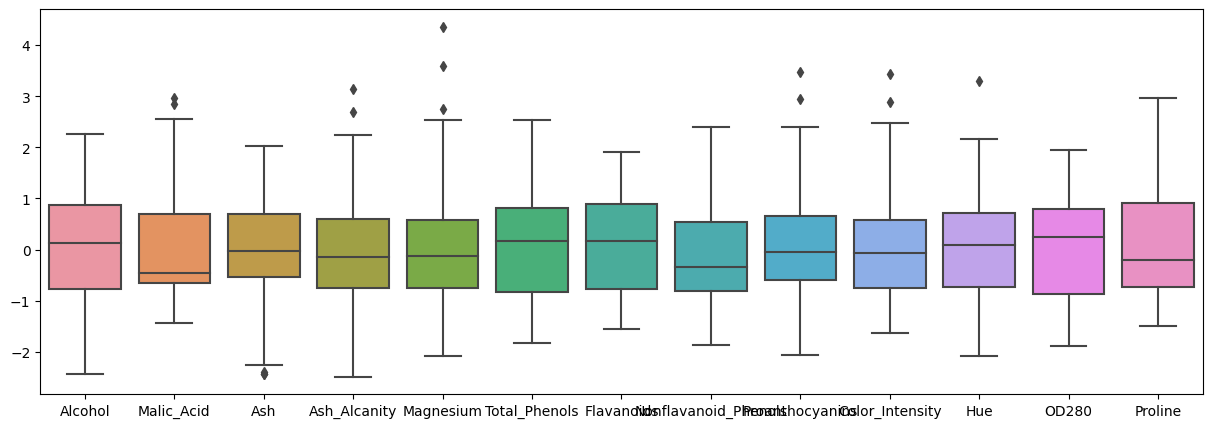

In [10]:
plt.figure(figsize=(15,5))



sns.boxplot(data=df_std)


plt.show()

In [11]:
ssd = []

for num_clusters in range(1,11):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, n_init=4)
    kmeans.fit(df_std)
    
    ssd.append(kmeans.inertia_)

In [12]:
kmeans.labels_

array([3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 6, 6, 6, 1, 7, 1, 1, 6,
       9, 6, 0, 1, 6, 6, 9, 1, 1, 1, 7, 2, 1, 6, 7, 7, 7, 7, 7, 1, 1, 9,
       5, 1, 1, 1, 6, 6, 1, 1, 7, 1, 7, 1, 1, 1, 7, 7, 7, 7, 1, 1, 2, 1,
       7, 1, 1, 1, 7, 7, 2, 5, 5, 5, 5, 8, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2,
       8, 8, 5, 5, 5, 8, 8, 8, 8, 2, 4, 4, 8, 2, 2, 2, 8, 2, 8, 8, 5, 5,
       8, 8, 8, 8, 8, 8, 4])

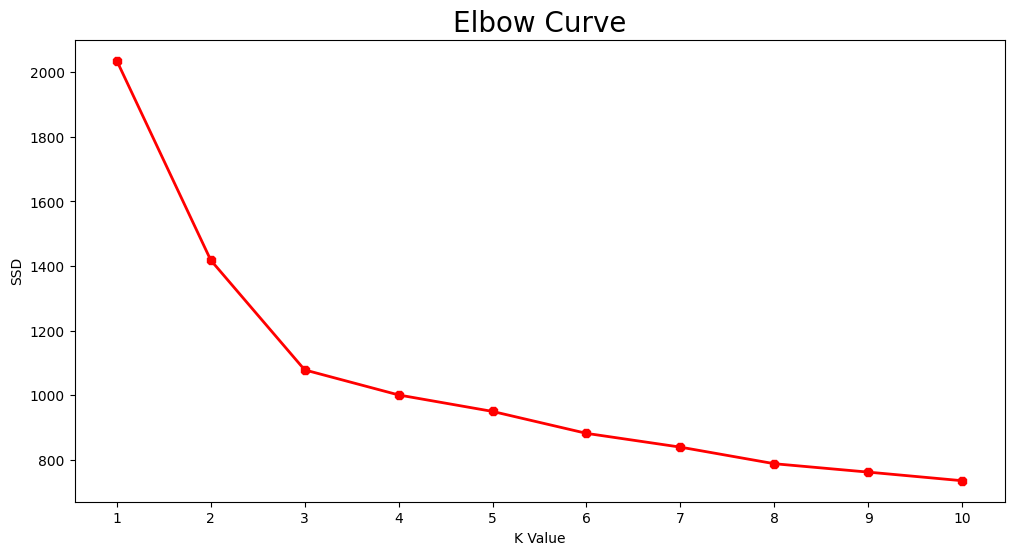

In [13]:
plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve", fontsize=20)
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD")

plt.show()

In [14]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_std)

c:\Users\droni\.pyenv\pyenv-win\versions\3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

In [15]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

In [16]:
df["Label"] = kmeans.labels_

In [17]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


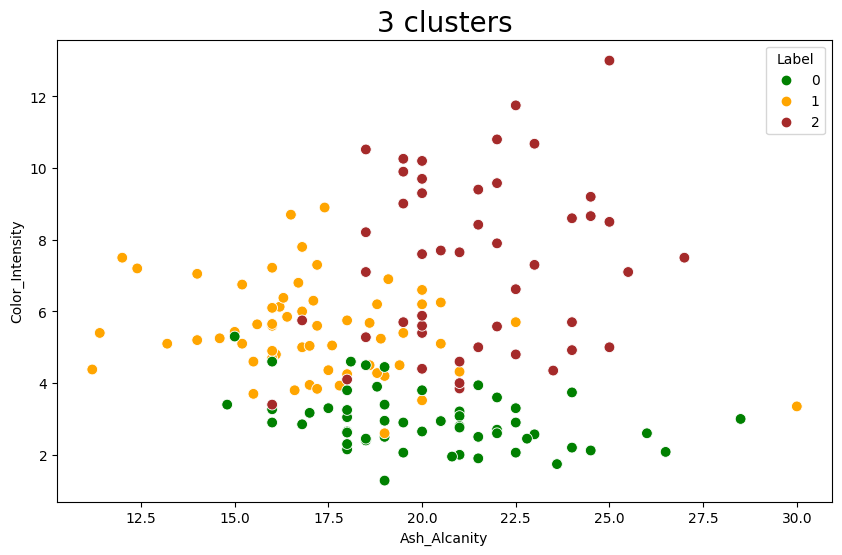

In [18]:
plt.figure(figsize=(10,6))

plt.title("3 clusters", fontsize=20)
sns.scatterplot(data=df, x="Ash_Alcanity", y="Color_Intensity", hue="Label", s=60, palette=['green','orange','brown'])
plt.show()

In [19]:
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(df_std)

c:\Users\droni\.pyenv\pyenv-win\versions\3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=2)

In [20]:
df["Label"] = kmeans.labels_

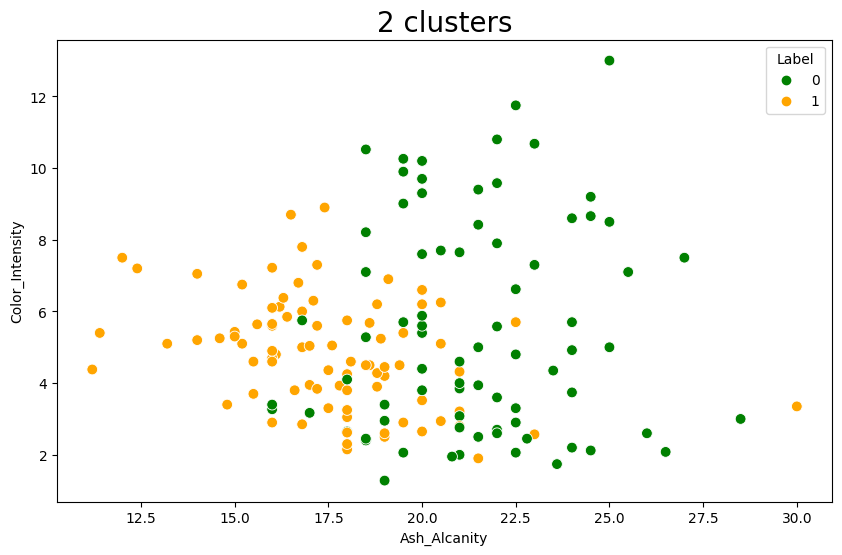

In [21]:
plt.figure(figsize=(10,6))

plt.title("2 clusters", fontsize=20)
sns.scatterplot(data=df, x="Ash_Alcanity", y="Color_Intensity", hue="Label", s=60, palette=['green','orange'])
plt.show()